In [2]:
# import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Create dataframe out of csv file: dropped_dataframe.csv
df = pd.read_csv('dropped_dataframe.csv')
#inspect dataframe using .head()
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Hacking/IT Incident,Other,Unauthorized Access/Disclosure,Theft,Improper Disposal,Loss,Unknown,Name of Covered Entity clean
0,Delta Dental of Illinois,IL,Business Associate,4216.0,2019-04-17,Hacking/IT Incident,Email,Yes,Breach #19-340335 will be consolidated into Br...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Delta Dental of Illinois
1,Providence Health Plan,OR,Health Plan,651.0,2019-03-19,Theft,Laptop,Yes,An unencrypted laptop computer containing the ...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Providence Health Plan
2,ZOLL Services LLC,PA,Healthcare Provider,277319.0,2019-03-18,Hacking/IT Incident,Network Server,Yes,"Sonian, a subcontractor of the covered entity’...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,ZOLL Services
3,Pasquotank-Camden Emergency Medical Service,NC,Healthcare Provider,20420.0,2019-02-28,Hacking/IT Incident,Network Server,No,"On December 14, 2018, Pasquotank-Camden Emerge...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,PasquotankCamden Emergency Medical Service
4,AltaMed Health Services Corporation,CA,Healthcare Provider,6000.0,2019-02-15,Hacking/IT Incident,Network Server,Yes,"On December 31, 2018, ShareCare Health Data Se...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,AltaMed Health Services Corporation


# Unique Type of Breach Categories:

In [4]:
# Plot unique values of breach types
df[['Hacking/IT Incident', 'Other', 'Unauthorized Access/Disclosure', 'Theft', 'Improper Disposal', 'Loss', 'Unknown']].sum().sort_values(ascending=False)

Theft                             825.0
Unauthorized Access/Disclosure    615.0
Hacking/IT Incident               389.0
Loss                              170.0
Other                              93.0
Improper Disposal                  72.0
Unknown                            13.0
dtype: float64

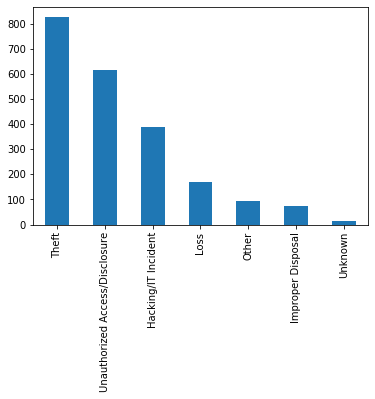

In [5]:
df[['Hacking/IT Incident', 'Other', 'Unauthorized Access/Disclosure', 'Theft', 'Improper Disposal', 'Loss', 'Unknown']].sum().sort_values(ascending = False).plot(kind='bar')

The top breach type is 'Theft' followed closely by "Unauthorized Access/Disclosure" and "Hacking/IT Incident" to make up the top three breach types.

# What are the top ten breach locations (methods)?

In [6]:
# Top 10 Location of Breached Information
df['Location of Breached Information'].value_counts().head(10)

Paper/Films                                480
Network Server                             309
Laptop                                     293
Email                                      222
Other                                      186
Desktop Computer                           142
Other Portable Electronic Device           122
Electronic Medical Record                   78
Other, Other Portable Electronic Device     46
Desktop Computer, Network Server            21
Name: Location of Breached Information, dtype: int64

[Text(0, 0, 'Paper/Films'),
 Text(0, 0, 'Network Server'),
 Text(0, 0, 'Laptop'),
 Text(0, 0, 'Email'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Desktop Computer'),
 Text(0, 0, 'Other Portable Electronic Device'),
 Text(0, 0, 'Electronic Medical Record'),
 Text(0, 0, 'Other, Other Portable Electronic Device'),
 Text(0, 0, 'Desktop Computer, Network Server')]

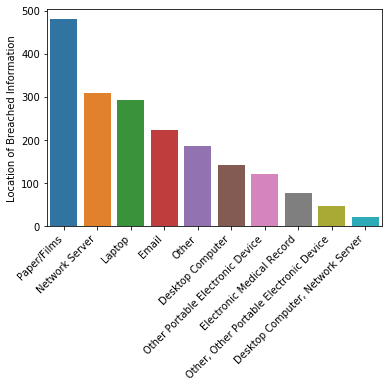

In [7]:
# Top 10 Location of Breached Information plot
# fix labels by rotating 45 degrees
graph  = sns.barplot(x=df['Location of Breached Information'].value_counts().head(10).index, y=df['Location of Breached Information'].value_counts().head(10))
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')

The top data breaches are primarily electronic minus Paper/Films as the major data breach location type.

In [8]:
# Group all cybersecurity related ("Hacking/IT Incident") "Location of Breached Information"
df.groupby('Location of Breached Information')['Hacking/IT Incident'].sum().head(10)

Location of Breached Information
0                                                                                                                                    0.0
Desktop Computer                                                                                                                    26.0
Desktop Computer, Electronic Medical Record                                                                                          2.0
Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server                                                           1.0
Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server, Other, Other Portable Electronic Device                  0.0
Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server, Other, Other Portable Electronic Device, Paper/Films     1.0
Desktop Computer, Electronic Medical Record, Email, Laptop, Other Portable Electronic Device                                         1.0
Desktop 

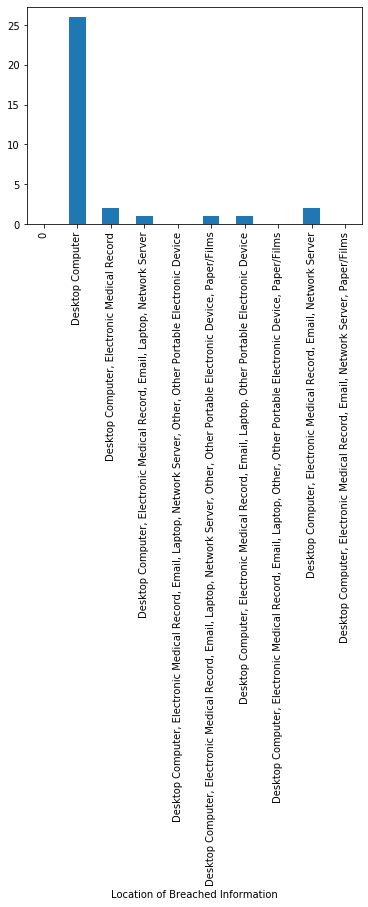

In [9]:
# Plot "Location of Breached Information" grouped by all cybersecurity related breach types using "Hacking/IT Incident"
df.groupby('Location of Breached Information')['Hacking/IT Incident'].sum().head(10).plot(kind='bar')

# What are the top ten states with the most breaches?

In [10]:
# Select the top ten states with the most breaches
df['State'].value_counts().head(10)

CA    248
TX    185
FL    146
NY    106
IL     95
PA     82
OH     64
MA     61
GA     61
NC     59
Name: State, dtype: int64

[Text(0, 0, 'CA'),
 Text(0, 0, 'TX'),
 Text(0, 0, 'FL'),
 Text(0, 0, 'NY'),
 Text(0, 0, 'IL'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'OH'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'GA'),
 Text(0, 0, 'NC')]

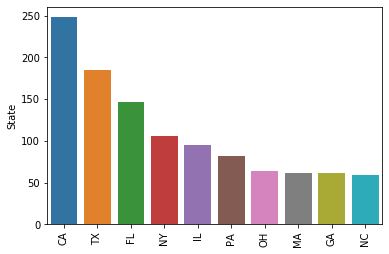

In [11]:
# Plot the tope ten states with the most breaches
state = sns.barplot(x=df['State'].value_counts().head(10).index, y=df['State'].value_counts().head(10))
state.set_xticklabels(df['State'].value_counts().head(10).index,rotation=90)

The top three states with the most breaches are California, Texas, and Florida. 

# What type of data breach is the most impactful on the number of individuals affected?

In [12]:
# Number of individuals affected by breach type (breach type impact)
df.groupby('Type of Breach')['Individuals Affected'].sum()

Type of Breach
0                                                                     0.0
Hacking/IT Incident                                           103230027.0
Hacking/IT Incident, Other                                         3720.0
Hacking/IT Incident, Other, Unauthorized Access/Disclosure         4354.0
Hacking/IT Incident, Theft                                        27800.0
Hacking/IT Incident, Theft, Unauthorized Access/Disclosure        13800.0
Hacking/IT Incident, Unauthorized Access/Disclosure              181253.0
Improper Disposal                                                915547.0
Improper Disposal, Loss                                            5690.0
Improper Disposal, Loss, Theft                                    53338.0
Improper Disposal, Theft                                            501.0
Improper Disposal, Theft, Unauthorized Access/Disclosure          17300.0
Improper Disposal, Unauthorized Access/Disclosure                   727.0
Loss                   

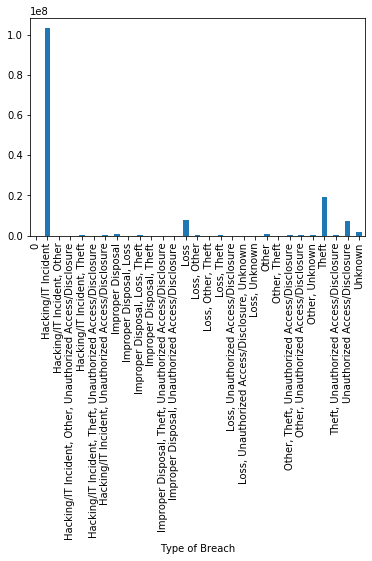

In [13]:
# plot breach type impact on number of individuals affected
df.groupby('Type of Breach')['Individuals Affected'].sum().plot(kind='bar')

Hacking/IT incident is the type of breach that affects the larget number of indivduals. Followed by Theft, Loss, and Unauthorized Access/Disclosure to smaller extents. 

# How are individuals afffected by breach type?

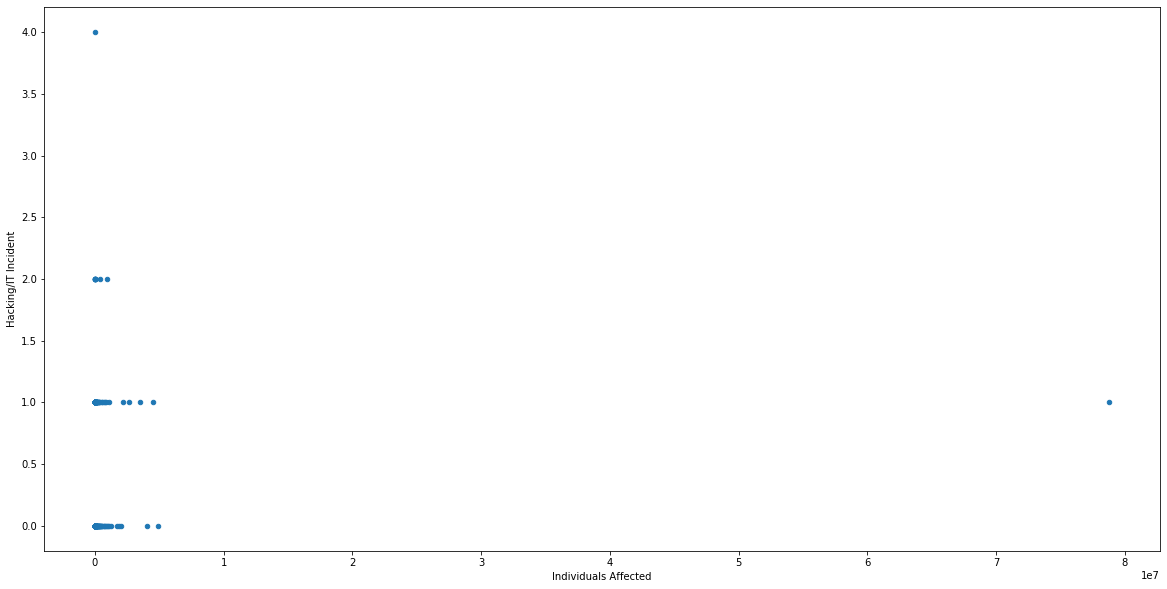

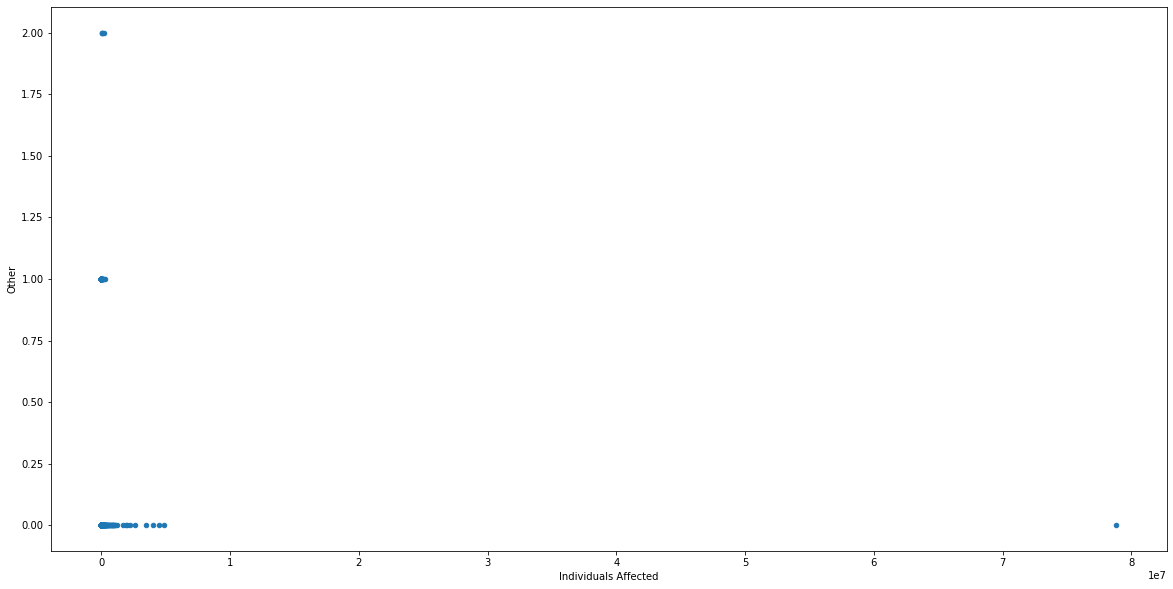

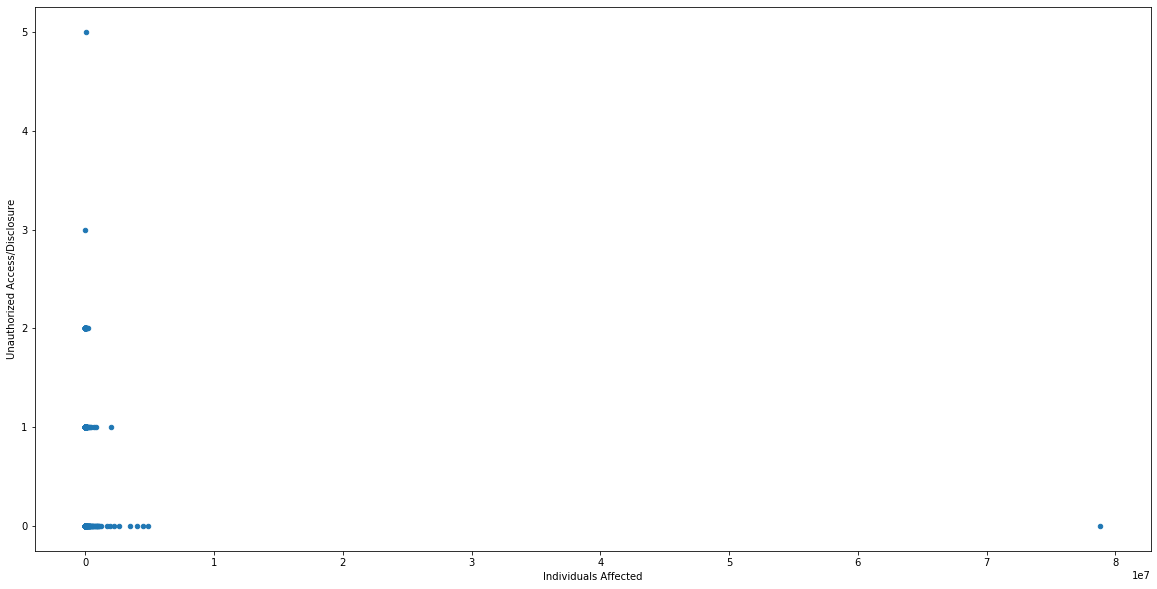

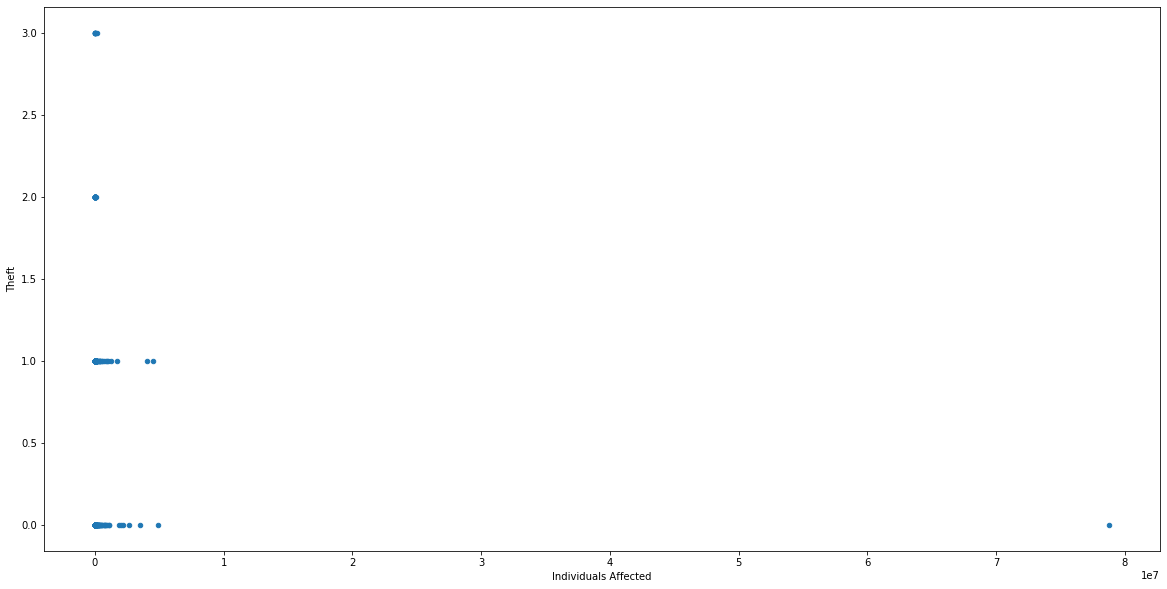

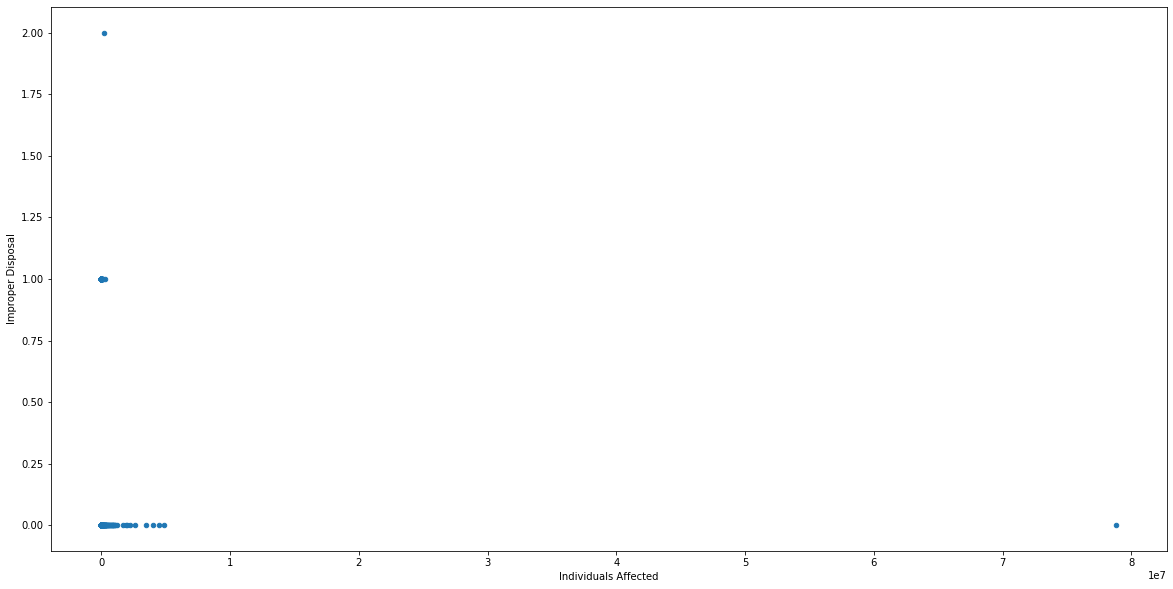

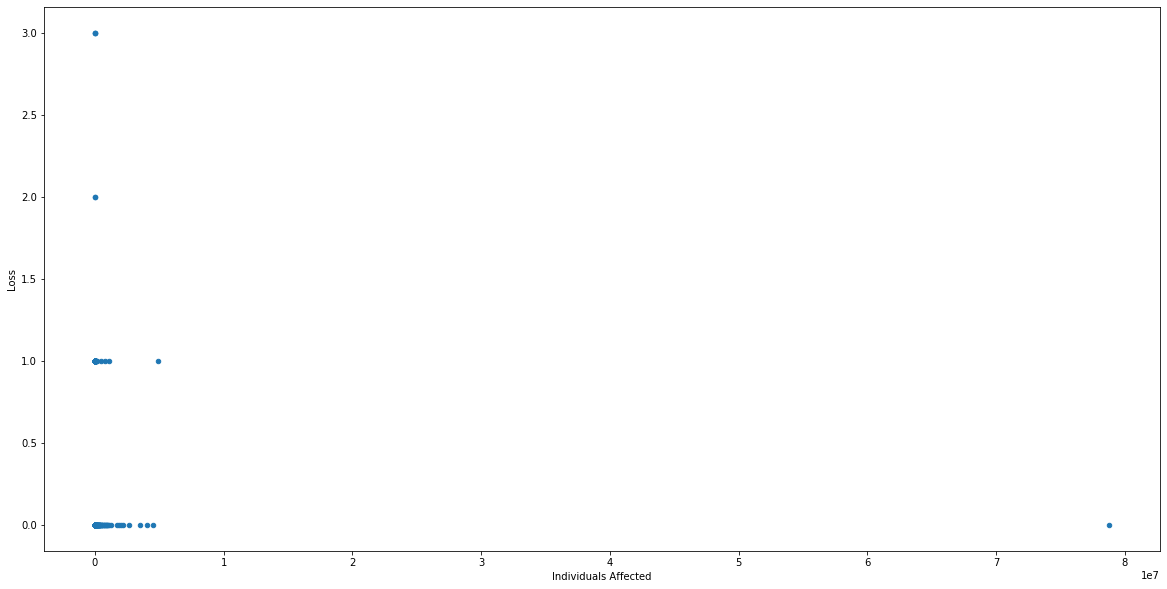

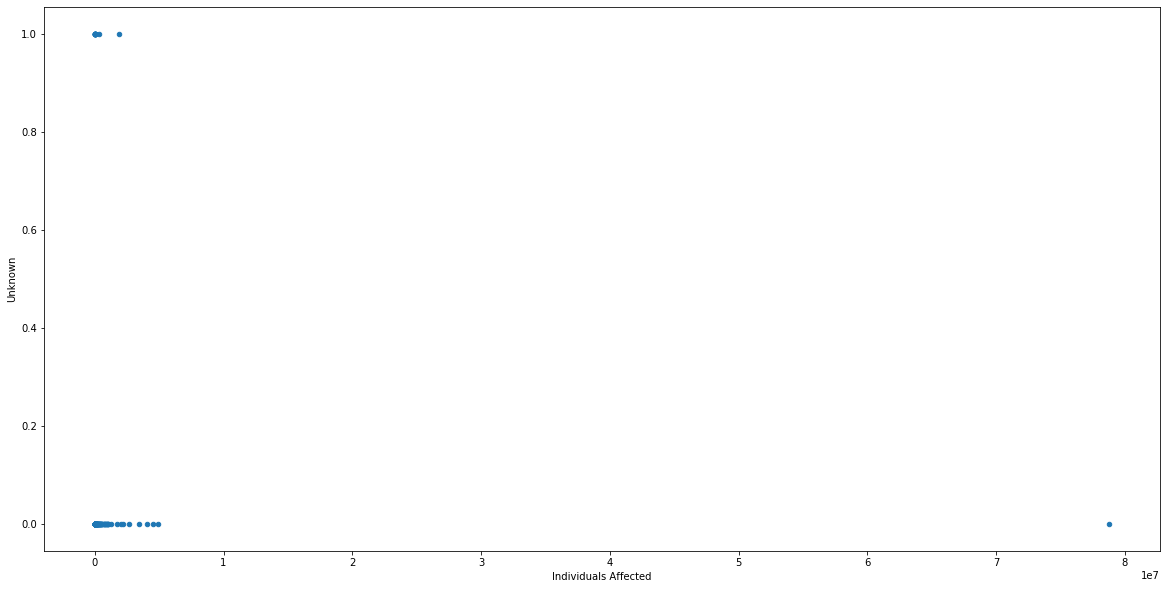

In [75]:
# Plot scatter plot of individuals affected by breach types

type_of_breaches = ['Hacking/IT Incident', 'Other', 'Unauthorized Access/Disclosure', 'Theft', 'Improper Disposal', 'Loss', 'Unknown']
for type_breach in type_of_breaches:
    df_scatterplot_types = df[['Name of Covered Entity', 'Individuals Affected', type_breach]].groupby('Name of Covered Entity').sum()
    df_scatterplot_types.plot(x = 'Individuals Affected', y = type_breach, kind = 'scatter')

# Which ten companies have the most breaches?

In [73]:
# Select top ten companies with the most breaches
df['Name of Covered Entity'].value_counts().head(10)

Walgreen Co.                                                       8
StayWell Health Management, LLC                                    6
University of California, San Francisco                            4
UnitedHealth Group health plan single affiliated covered entity    4
Henry Ford Health System                                           4
Mount Sinai Medical Center                                         4
The University of Texas MD Anderson Cancer Center                  4
Memorial Healthcare System                                         4
Oregon Health & Science University                                 4
Clearpoint Design, Inc.                                            4
Name: Name of Covered Entity, dtype: int64

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


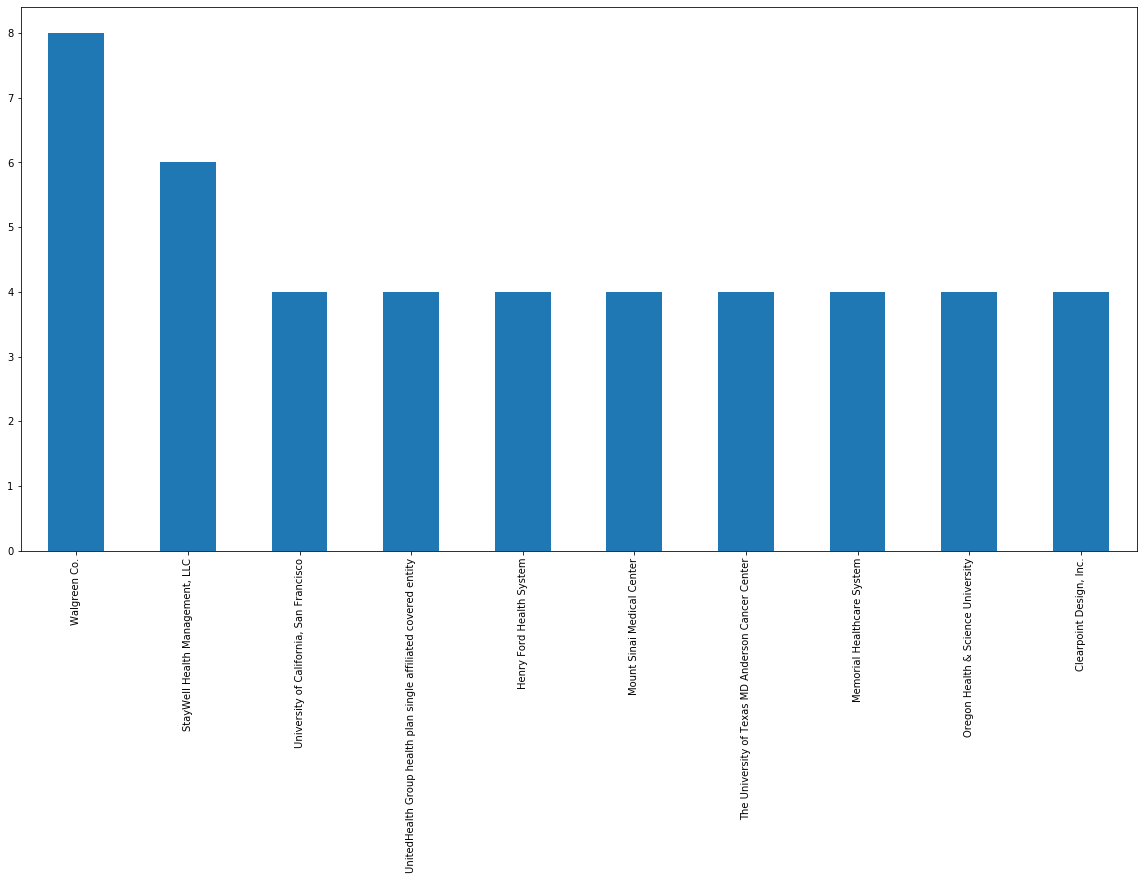

In [74]:
# Plot of top ten companies with the most breaches
df['Name of Covered Entity'].value_counts().head(10).plot('bar')

These are the 10 companies with multiple breaches occuring the most.

# Breaches over time

In [34]:
# convert "Breach Submission Date" to datetime format

df['Breach Submission Date'] = pd.to_datetime(df['Breach Submission Date'], infer_datetime_format=True, errors='coerce')
df['Breach Submission Date']

0      2019-04-17
1      2019-03-19
2      2019-03-18
3      2019-02-28
4      2019-02-15
          ...    
2079   2009-11-20
2080   2009-11-17
2081   2009-10-30
2082   2009-10-28
2083   2009-10-21
Name: Breach Submission Date, Length: 2084, dtype: datetime64[ns]

In [36]:
# select columns to plot
df_dates = df[['Breach Submission Date', 'Name of Covered Entity']]

# groupby dates column and count of breaches
df_dates = df_dates.groupby('Breach Submission Date').count()

#rename original column to breaches
df_dates = df_dates.rename(columns={'Name of Covered Entity': 'Breaches'})

df_dates

,Breaches
Breach Submission Date,
2009-10-21,1
2009-10-28,1
2009-10-30,1
2009-11-17,1
2009-11-20,5
...,...
2019-02-15,1
2019-02-28,1
2019-03-18,1


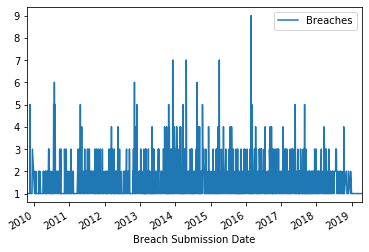

In [37]:
# plot number of breaches by date
df_dates.plot()

In [38]:
# Clean up graph by groupby month 
df_dates_groupby_month=df_dates.resample("M", how='sum')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


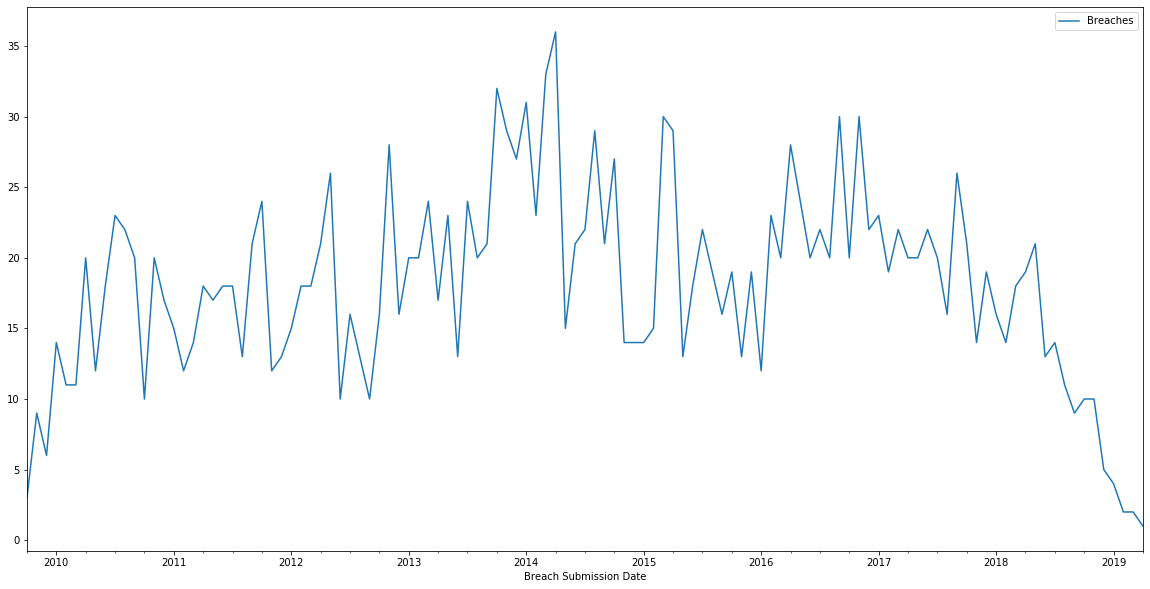

In [40]:
# resize plot

fig_size = plt.rcParams["figure.figsize"]
fig_size

fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

df_dates_groupby_month.plot()

Breaches increase from 2010 onwards, peaking around 2014 and then appear to follow a general decline. 